IDEAS:

 - Eastern and Western Poison Ivy Datasets
  > Let's first try training 1 model on a combined dataset. If model prediction values are poor, or model success rates on external test data is poor, we will retrain the model on 1 of the 2, and test again. 
  > https://www.kaggle.com/datasets/hanselliott/toxic-plant-classification
 - Yes/No or This/That classifier?
  > "Toxic Plant Classification" on Kaggle uses the "this/that" approach, where the plant is either THIS or THAT. The project trains m

# Import Libraries

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt

In [24]:
print("TF v:", tf.__version__)

TF v: 2.12.0


# Import Images

## Check Image Quality

Eastern Poison Ivy, IMG 000


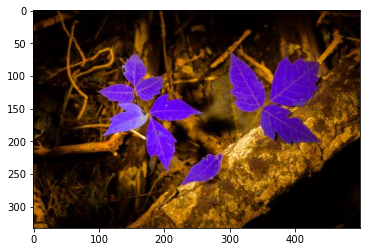

In [25]:
img_test = cv2.imread('data/002/000.jpg')
plt.imshow(img_test)
print('Eastern Poison Ivy, IMG 000')

## Load and preprocess images 

In [33]:
# Loading Eastern and Western variants into individual classes
dir = 'data/' 

# Creating training set
train_pi = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.2,
  subset='training',
  seed=123,
  image_size=(399, 399),
  batch_size=32)

# Creating test set
val_pi = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.2,
  subset='validation',
  seed=123,
  image_size=(399, 399),
  batch_size=32)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


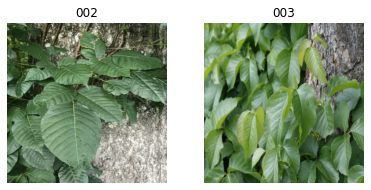

In [45]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_pi.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")